In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten


train_datagen = ImageDataGenerator(rescale=1./255)
train_dataset = train_datagen.flow_from_directory(
    r"C:\Users\SAIVARUN\OneDrive\Desktop\project\updateddata\outdata\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_dataset = val_datagen.flow_from_directory(
    r"C:\Users\SAIVARUN\OneDrive\Desktop\project\updateddata\outdata\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


input_img = Input(shape=(224, 224, 3))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


flat_decoded = Flatten()(decoded)

autoencoder = tf.keras.models.Model(input_img, flat_decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

model_history = autoencoder.fit(train_dataset, epochs=5, validation_data=val_dataset)


Found 1286 images belonging to 2 classes.
Found 421 images belonging to 2 classes.
Epoch 1/5
41/41 [==============================] - 382s 9s/step - loss: 0.6695 - binary_accuracy: 0.6011 - val_loss: 0.5610 - val_binary_accuracy: 0.7031
Epoch 2/5
41/41 [==============================] - 378s 9s/step - loss: 0.5214 - binary_accuracy: 0.6677 - val_loss: 0.3397 - val_binary_accuracy: 0.9152
Epoch 3/5
41/41 [==============================] - 373s 9s/step - loss: 0.3932 - binary_accuracy: 0.9003 - val_loss: 0.2301 - val_binary_accuracy: 0.9402
Epoch 4/5
41/41 [==============================] - 384s 9s/step - loss: 0.2341 - binary_accuracy: 0.9181 - val_loss: 0.1442 - val_binary_accuracy: 0.9509
Epoch 5/5
41/41 [==============================] - 375s 9s/step - loss: 0.2157 - binary_accuracy: 0.9239 - val_loss: 0.1996 - val_binary_accuracy: 0.9385


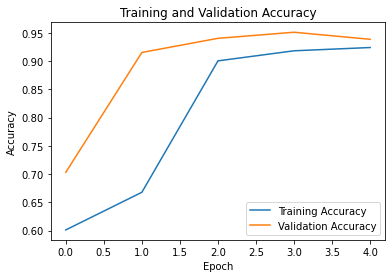

In [3]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

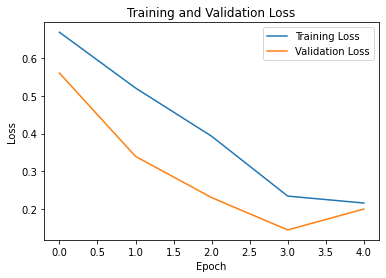

In [4]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()